[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task3_dmrf_OOP.ipynb)

# Задание
Реализовать с помощью объектно-ориентированного подхода предыдущие 2 задания. Создайте для каждой из задач отдельный класс, который позволяет ее решить.

* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe, а также в excel, pickle, БД

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных

*  Сделать визуализацию для мини-исследования рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.



In [1]:
import requests
from tqdm.auto import tqdm
from collections import defaultdict
import pandas as pd
import sqlite3

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

## Список объектов

In [2]:
# offset_ = 1
# limit_ = 1000
# url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
# res = requests.get(url)
# objects_data = res.json()

# Данные по определенному объекту

In [3]:
# url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/36774'

In [9]:
class DomIdLoader:
    def __init__(self):
        self.offset_ = 0
        self.limit_ = 100
        self.sortField_ = 'devId.devShortCleanNm'
        self.sortType_ = 'asc'
        self.objStatus_ = '0'
        self.objects_data = None
        self.data = pd.DataFrame()
        self.ids = []
        
    def get_ids(self):
            url1 = f'https://наш.дом.рф/сервисы/api/kn/object?offset={self.offset_}&limit={self.limit_}&sortField={self.sortField_}&sortType={self.sortType_}&objStatus={self.objStatus_}'
            res1 = requests.get(url1)
            reestr1 = res1.json()
            total = reestr1.get('data').get('total')
                        
            while self.offset_<= total:
        
                    url2 = 'https://наш.дом.рф/сервисы/api/kn/object'
                    params = (
                              ('offset', self.offset_),
                              ('limit', 100),
                              ('sortField', 'devId.devShortCleanNm'),
                              ('sortType', 'asc'),
                              ('objStatus', '0')
                             )

                    response = requests.get(url2, params = params)
                    reestr2 = response.json()
                    obj = reestr2.get('data').get('list')

                    if obj == None:
                              continue

                    self.ids.extend([x.get('objId') for x in obj])

                    self.offset_ += 100
            print("ID строящихся домов собраны!")

    def get_object(self):
        for id in tqdm(self.ids):
            try:
                    url3 = f'https://наш.дом.рф/сервисы/api/object/{id}'
                    res3 = requests.get(url3)
                    r = res3.json()
            except:
                    print('прерывание')
            else:
                    obj2 = r.get('data')
                    df = pd.json_normalize(obj2)
                    self.data = self.data.append(df, ignore_index=True)
        print("Создан DataFrame")
        return self.data
    

    def get_df_with_objects(self):
        self.get_ids()
        self.objects_data = self.get_object()
        return self.objects_data

In [10]:
nashd_loader = DomIdLoader()
nashdf = nashd_loader.get_df_with_objects()

ID строящихся домов собраны!


  0%|          | 0/10781 [00:00<?, ?it/s]

прерывание
прерывание
прерывание
прерывание
прерывание
прерывание
Создан DataFrame


In [11]:
nashdf

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objLivCeilingHeight,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,objElevatorCargoPassengerCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objectTransportInfo,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.developerGroupName,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroupId,developer.objGuarantyEscrowFlg,developer.govFundFlg,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,nameObj,transportDistIndex,transportDistIndexValue,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors,airQualityIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,complexShortNm,greenAreaIndexValue,rnvFlg,rnvDTO
0,13391,37219,28101,72,"г Тюмень, ул Профсоюзная",3,12,44,2023-03-31,Другое,По желанию заказчика,Есть,41,4297.44,72-000096,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,19-12-2022 07:25,57.1541,65.5595,1,0,Элитный,20-12-2022 01:22,"[{'objId': 13391, 'pdId': 28101, 'rpdId': 6699...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,37219.0,12,44,4297.44,26,0,True,31-05-2023 12:00,"2,8",0,1.0,1.0,1.0,0.0,9.0,1,1,0.0,2.0,2.0,6,0.450622,55893.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,[],False,info@2mengroup.ru,0,B,9,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",669902.0,1,72.0,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,1,Акционерное общество,АО,5776.0,0,0,11.0,16.0,12.0,5.0,44.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13383,39024,28105,72,г Тюмень,4,20,68,2023-03-31,Другое,По желанию заказчика,Есть,31,6296.55,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,19-12-2022 07:32,57.1519,65.5536,1,0,Элитный,20-12-2022 01:22,"[{'objId': 13383, 'pdId': 28105, 'rpdId': 6699...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,39024.0,20,68,6296.55,10,0,True,31-05-2023 12:00,"2,8",0,1.0,1.0,1.0,0.0,11.0,1,1,0.0,5.0,1.0,7,0.406985,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,[],False,info@2mengroup.ru,0,B,10,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",669902.0,1,72.0,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,1,Акционерное общ

In [12]:
class Saver:
    def __init__(self, data):
        self.data = data
                
    def save_csv(self):
        self.data.to_csv('name.csv', index = False)

    def save_xl(self):
        self.data.to_excel('name.xlsx')
    
    def save_pkl(self):
        self.data.to_pickle('name.pkl')
    
    def save_sql(self):
        conn = sqlite3.connect('namebd.db')  
        cur = conn.cursor()
        self.data = self.data.applymap(str)
        self.data.to_sql('namesbd', conn)

In [13]:
t = Saver(nashdf)

In [14]:
t.save_csv()
t.save_xl()
t.save_pkl()

In [15]:
t.save_sql()

In [16]:
 class ObjectInfoExtractor:
    def __init__(self, data):
        self.data = data
        
    def df_converter(self):
        col = ['id', 'developer.devShortCleanNm', 'region', 'developer.regRegionDesc', 'address', 'objLkClassDesc',
     'wallMaterialShortDesc', 'objLkFinishTypeDesc', 'objReady100PercDt', 'soldOutPerc', 'objElemParkingCnt',
     'objElemLivingCnt', 'objSquareLiving',  'floorMax', 'objPriceAvg']
        self.data = self.data[col]
        self.data.rename(columns = {'id': 'id дома', 'developer.devShortCleanNm': 'застройщик', 'region': 'номер региона',
                      'developer.regRegionDesc': 'название региона', 'address': 'адрес дома',
                      'objLkClassDesc': 'класс недвижимости', 'wallMaterialShortDesc': 'материал стен',
                      'objLkFinishTypeDesc': 'тип отделки', 'objReady100PercDt': 'ввод в эксплуатацию',
                      'soldOutPerc': 'распроданность квартир', 'objElemParkingCnt':'количество мест в паркинге',
                       'objElemLivingCnt': 'количество квартир', 'objSquareLiving': 'жилая площадь', 
                      'floorMax': 'количество этажей', 'objPriceAvg': 'средняя цена за 1 м²'}, inplace=True)
        
        self.data['ввод в эксплуатацию'] = pd.to_datetime(self.data['ввод в эксплуатацию'], dayfirst=True)
        self.data['количество мест в паркинге'].fillna(0, inplace = True)
        self.data['распроданность квартир'].fillna(0, inplace = True)
        return self.data

    
    def df_sktb(self):
        print('выберем Смоленскую, Калужскую, Тверьскую и Брянскую области')
        self.d = self.data
        self.d = self.d.loc[(self.d['номер региона'] == 67) | (self.d['номер региона'] == 40) | 
                (self.d['номер региона'] == 69) | (self.d['номер региона'] == 32)]
        self.d = self.d.reset_index()
        self.d = self.d.drop(['index'],axis=1)
        return self.d
    
    def df_infa(self):
        print(self.data.info())
        
        

In [17]:
y = ObjectInfoExtractor(nashdf)

In [18]:
y.df_converter()

,id дома,застройщик,номер региона,название региона,адрес дома,класс недвижимости,материал стен,тип отделки,ввод в эксплуатацию,распроданность квартир,количество мест в паркинге,количество квартир,жилая площадь,количество этажей,средняя цена за 1 м²
0,13391,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная",Элитный,Другое,По желанию заказчика,2023-03-31,0.450622,41,44,4297.44,12,55893.0
1,13383,2МЕН ГРУПП,72,Тюменская область,г Тюмень,Элитный,Другое,По желанию заказчика,2023-03-31,0.406985,31,68,6296.55,20,53109.0
2,13398,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,1.000000,0,43,4812.98,10,47886.0
3,13397,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.999984,0,65,6248.51,12,45523.0
4,13399,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.917243,125,0,0.00,1,50768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10770,28071,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2024-06-30,0.071155,0,288,14870.40,26,85604.0
10771,28070,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2025-03-31,0.072883,0,768,29620.10,26,85309.0
10772,28073,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2024-06-30,0.070834,0,312,14872.80,26,85634.0
10773,44447,ЯРОСЛАВЛЬЗАКАЗЧИК,76,Ярославская область,"г Ярославль, Фрунзенский район, территория в р...",Типовой,Кирпич,Другое,2022-12-31,0.255401,0,127,6764.22,6,70681.0


In [19]:
y.df_sktb()

выберем Смоленскую, Калужскую, Тверьскую и Брянскую области


,id дома,застройщик,номер региона,название региона,адрес дома,класс недвижимости,материал стен,тип отделки,ввод в эксплуатацию,распроданность квартир,количество мест в паркинге,количество квартир,жилая площадь,количество этажей,средняя цена за 1 м²
0,40008,ГК ЖБИ-2,69,Тверская область,"г Тверь, переулок 1-ый Вагонников, д. 6",Комфорт,Кирпич,Без отделки,2023-06-30,1.000000,0,79,4765.50,11,38946.0
1,41000,ГК ЖБИ-2,69,Тверская область,"г Тверь, переулок 1-ый Вагонников, д. 6",Комфорт,Кирпич,Без отделки,2023-06-30,0.020472,0,55,3111.50,8,47400.0
2,5120,ЖИРАФ И К,69,Тверская область,"г Тверь, улица Терещенко, д. 6, корпус 4",Типовой,Другое,По желанию заказчика,2022-12-31,1.000000,0,79,4097.10,16,41180.0
3,48244,ЖК РЕЧНОЙ,32,Брянская область,г Брянск,Комфорт,Монолит-кирпич,Без отделки,2025-12-31,0.000000,0,129,6737.99,21,NaN
4,40676,ИСК ФИНАНСИНВЕСТ,69,Москва город,г Тверь,Типовой,Монолит-кирпич,Без отделки,2023-09-30,0.722755,0,231,14082.92,23,69542.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,34611,УНИМАРКЕТ,40,Калужская область,"г Калуга, улица Кутузова, д. 14 16",Комфорт,Кирпич,Без отделки,2023-03-31,0.890705,0,12,979.00,6,57912.0
259,42543,ФОНД ПОДДЕРЖКИ СТРОИТЕЛЬСТВА ДОСТУПНОГО ЖИЛЬЯ ...,40,Калужская область,"п Воротынск, ул Сиреневый Бульвар, д. 8, строе...",Типовой,Другое,Без отделки,2022-12-31,0.072988,0,60,3148.20,6,32661.0
260,42543,ФОНД ПОДДЕРЖКИ СТРОИТЕЛЬСТВА ДОСТУПНОГО ЖИЛЬЯ ...,40,Калужская область,"п Воротынск, ул Сиреневый Бульвар, д. 8, строе...",Типовой,Другое,Без отделки,2022-12-31,0.072988,0,60,3148.20,6,32661.0
261,37772,ЦЕНТРСТРОЙ,69,Тверская область,"г Тверь, ул Гончаровой, д. 34",Комфорт,Кирпич,Без отделки,2023-06-30,0.000000,0,0,0.00,1,NaN


In [20]:
y.df_infa()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10775 entries, 0 to 10774
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id дома                     10775 non-null  int64         
 1   застройщик                  10775 non-null  object        
 2   номер региона               10775 non-null  int64         
 3   название региона            10649 non-null  object        
 4   адрес дома                  10748 non-null  object        
 5   класс недвижимости          10775 non-null  object        
 6   материал стен               10775 non-null  object        
 7   тип отделки                 10775 non-null  object        
 8   ввод в эксплуатацию         10775 non-null  datetime64[ns]
 9   распроданность квартир      10775 non-null  float64       
 10  количество мест в паркинге  10775 non-null  int64         
 11  количество квартир          10775 non-null  int64     

In [21]:
class Visualizer:
    def __init__(self, data):
        self.data = data

    def make_boxplot(self):
        print('количество строящихся домов по регионам')
        g1 = self.data['номер региона'].value_counts()
        g1.plot(kind='bar')
        plt.xlabel('регион')
        plt.ylabel('количество домов')
        plt.title("Количество строящихся домов по регионам")
        plt.show()
    
        
    def make_pie(self):
        g = (self.data.groupby(self.data['номер региона'])[['жилая площадь']].sum()).sort_values('жилая площадь')
        v = g['жилая площадь']
        labels = g.index
        explode = [0, 0.1, 0, 0.2]
        plt.pie(v, labels=labels, explode=explode, autopct="%1.1f%%")
        plt.title("Объемы вводимого жилья по регионам")
        plt.show()

In [22]:
e = y.df_sktb()
o = Visualizer(e)

выберем Смоленскую, Калужскую, Тверьскую и Брянскую области


количество строящихся домов по регионам


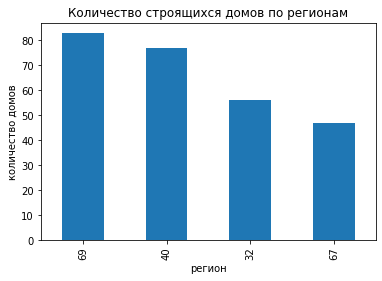

In [23]:
o.make_boxplot()

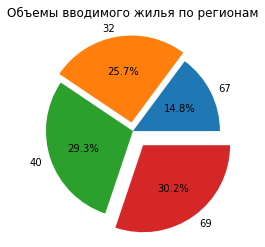

In [24]:
o.make_pie()